# Understanding the dynamics of first order differential equations using Flow

## Describing differential equations

*Note: This lecture is derived from Strogatz chapter 2. Always a great read.*

We know by now that differential equations define how a **state variable** (often simply called a **state**) changes with regard to other independent variables. Here are some terms to be familiar with and to help describe differential equations

- **Ordinary differenial equation (ODE)** : $\frac{dy}{dt} = 25*y-25$ is an ODE because it involves only ordinary derivatives.
- **Partial differential equation (PDE)** : $ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} $ is a partial PDE with t and x being independent variables.
- **System of differential equations** : like...more than one differential equation.

The item we will focus on for the first part of the class will be primarily linear vs nonlinear ODE systems (we'll get to PDEs later). So let's define a linear system first:

- A linear system is when all of the state variables on the right hand side of the equations are to the first order. For example, here is a homogeneous ODE system: 

\begin{align}
\frac{dx}{dt} = 25x-2y+4z\\
\frac{dy}{dt} = 5x-20y+9z\\
\frac{dz}{dt} = 2x-12y\\
\end{align}

- Called **linear equations** because the right hand side is linear.
- What makes this **homogenous**? There is no "intercept". A non-homogeneous equations looks like $\frac{dy}{dt} = 25*y-25$ where the equation has a term "25" that does not multiple a state variable. Why this matters will be obvious later on.
- This is also an example of a **time-invariant system**. Mathematically, this means the right hand side does not have time as an explicit variable. Another term for time-invariant is autonomous.
  - Physically, being time-invariant means that is doesn't matter what time it is. For example, if you have the trajectory equation of a ball being hit through the air, does it matter at what time the ball was hit? 4 PM vs 6 PM? Nope, gravity will impact the ball all the same.

- A nonlinear system is anything that **is not linear.** 

## So why will we focus on nonlinear systems?

The vast majority of physical processes and real world systems are **nonlinear.** Basic studies on ecosystems, economics, immunology, lasers, coupled oscillators, solid-state physics, and more all involve understanding how nonlinear systems work. However, analytically solving nonlinear systems is rarely possible.

To bring this even further home to chemical engineering, almost all of the most important processes we study are nonlinear. These include chemical kinetics, energy transport, fluid transport, thermo. Explicit examples of behaviors that require description with nonlinear equations are runaway reactions in polymer kinetics (explosions), sudden switching between low and high temperatures during continously-fed, exo-thermic reactions, convection patterns in evenly heated plates, and more. 

It is essential for us to have methods to analyze and understand the dynamic responses on nonlinear systems when possible. And if not possible, we need to be able to confidently simulate such systems. So we will begin with the easiest case.

# First order ODEs and Flow on a line analysis

A derivative describes change. For small, first order systems, we can directly analyze the derivate function to understand the dynamic responses without solving the ODE and without simulating the system.

We'll start with a personal favorite example: if given $\dot y = sin(y)$, analytically solve for y and determine how y changes over time for when $y_0=0$ or $y_0=4$. Do this on your own time because it takes a while. Eventually, you'll get 

$t = -ln|csc(y)+cot(y)|+ln|cos(y_0)+cot(y_0)|$

From this messy equation, it is very difficult to really understand how and why this system evolves in time given different initial conditions. Instead, let's directly analyze the derivative. To do so, plot the derivative (on the y axis) vs different values of y. 

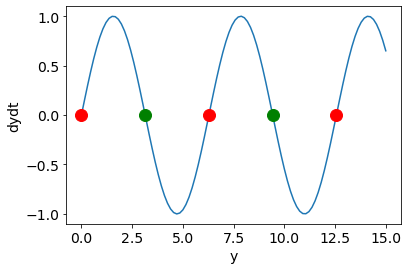

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def dydt(y):
    dydt = math.sin(y)
    return dydt


y_values = np.linspace(0,15,100)

dydt_values = []
for m in y_values:
    dydt_values.append(dydt(m))
    
# Plot derivative vs y
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("y")
plt.ylabel("dydt")
plt.plot(y_values,dydt_values);
plt.plot([math.pi,3*math.pi],[0,0], color='green', marker = 'o', linestyle = 'none',markersize=12);
plt.plot([0,2*math.pi,4*math.pi],[0,0,0], color='red', marker = 'o', linestyle = 'none',markersize=12);



Obviously, we could generate this by hand pretty easily. But some equations will be more difficult and we should be able to code this. 

Now here's what we can learn:

Our favorite thing to calculate in ChE is the steadystate, the values of y for which the derivative is zero. As we can see, there is an infinite number of possible steadystates as y -> infinite. Where we end up will depend on the where we start on our line.

How do we determine which steadystate we end up at? Well we start at our selected initial condition. Let's start at $y_0 = 1$ and remember back to our very young days when we first met a derivative. A *positive* derivative means our state y is increasing in time. From our starting point, the solution will "flow" to the right. A *negative* derivative means that the state y is decreasing in value with time. The larger the value of the derivative, the larger the change in time is. So if we take very small steps in time, we can calculate the derivative an approximate how quickly our state y is changing in time.

Starting at 1, our dydt ~ .25. Without being very precise, we know that in time, the value of y is growing. If we continue to follow the curve, we see dydt increase to a peak value of y and then drops to a value of 0 at y = $\pi$.Throughout that range, the value of y increases, first slowly, then quickly and then more slowly until the growth stops altogether at the steadystate.

Or in short, starting at $y_0 = 1$, we can see the solution of y in time will evolve to a values of $y = \pi$. What about $y_0 = 4$? Well now our derivative is negative, the value of y will drop in time and y will again evolve to a steadystate value of $\pi$. We can repeat this rapidly for various steadystates and very quickly understand general dynamic response of this system

This is a nutshell is "Flow on a line". We follow the value of y along the derivative until we hit a steady state to understand the general dynamics of a first order nonlinear system.

Using this approach: we can easily and quickly
- prove that **oscillatory behaviors cannot occure in first order nonlinear systems**. 
- perform a stability analysis of steadystates. 

## Looking at the time trajectories to re-emphasize

Above I described in words how the solution **should** evolve for different initial starting values. Let's check that I didn't lie. Below is the code to run an ODE. We have seen this before in our Introduction and this is important code to be familiar with as you'll use it in basically all your classes.

The best way to understand this code is to **break it**. There is one typo below. Figure out what it is and then simulate the system for initial conditions ($y_0$) at 1, 5 and 7. 
- Does the solution evolve to the expected steady state?
- Could you sketch a loose approximation of the trajectory with just the flow on a line plot?


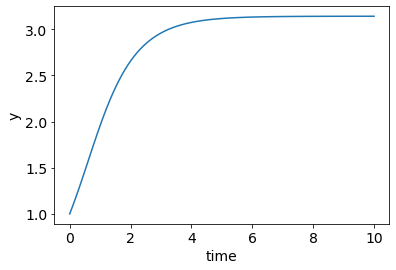

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def dydt(y,t):
    dydt = math.sin(y)
    return dydt

from scipy.integrate import odeint

timesteps = np.linspace(0,10,100)

# Alternatively, call define time steps using numpy.arange. For example:
# numpy.arange(0,10,0.1)

y0 = 1.0  # the initial condition
y = odeint(dydt, y0, timesteps)


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("y")
plt.plot(timesteps, y);



# Local Stability Analysis Using Flow

Stability analysis of a first order ODE system comes for free from a Flow on a line analysis. Stability has some formal definitions that we will touch on more when we get to second order systems and higher. Here, we focus on local stability, which is when initial conditions near a steadystate evolve towards that steadystate.

Looking at our example system above, when we consider the steadystate value of $y = \pi$, we see that if we take an infinitesmal step to the left, the derivative is positive and the solution of y will flow back to the steadystate. If we take a very small step to the right, we again will flow back to the left. This is a stable steadystate. Any perturbation away from steadystate will settle back down to the steadystate.

But if we consider the steadystate at $y = 2\pi$, the opposite occurs. Any infinitesmal perturbation to the left of the SS will continue to flow left - away from the SS. Unstable steadystates represent steady points that cannot be reached in the real world. In the real world, uncertainty always exists and this uncertainty will cause a solution to ultimately be pushed away from this point.

Obviously, we could formalize this argument more and do the whole add an episilon to the steady state and show that either decays exponentially in time or explodes exponentially in time. **But odds are you've done this before**. My hope is that by using the flow on a line approach, we can better understand stability without the formalism.

We'll come back to this when we discuss linear first order differential equations.

# OK - Linear first order systems: boring but useful
I have mentioned that first order systems are boring. First order linear systems are even more so. It's useful to again think on why. A first order, linear ODE only has one form:

$\frac{dy}{dt} = Ay+b$

If we sketch the flow diagram, it should be obvious that
- There can only be one steadystate value, $y_{ss}=-b/A$.
- The slope is A.
  - If A is negative, the steadystate is stable.
    - Else, the steadystate is unstable.

And that's it. However simple, linear equation are very useful for characterizing system dynamics of a nonlinear system near a steadystate. This is because within small ranges around a steadystate, systems are nearly linear.

In the cell below, run the code necessay to simulate $\frac{dy}{dt} = -y+3$ with an initial condition of y = 1. How does this compare to the solution of sin(y) above?

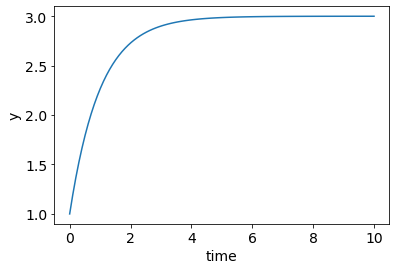

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def dydt(y,t):
    dydt = -y+3;
    return dydt

from scipy.integrate import odeint

timesteps = np.linspace(0,10,100)

# Alternatively, call define time steps using numpy.arange. For example:
# numpy.arange(0,10,0.1)

y0 = 1.0  # the initial condition
y = odeint(dydt, y0, timesteps)


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("y")
plt.plot(timesteps, y);

Compare this plot to the plot above for a nonlinear ODE, $\frac{dy}{dt} = sin(y)$. They look very similar. And this is the idea behind linearized.

**In short**, we can identify some straight-line relationship that accurately defines the ODE's dynamics near a stable steadystate. 

# Linearization
Linearization means to approximate part of a nonlinear equation with a linear equation. 

- As we saw above, this can be done. 
- And remember, the part we are linearizing is the *right hand side of equation!*
    - We are NOT solving an ODE. We take the RHS of the differential equation and make it into the form f = mx+b where $f=\frac{dy}{dt}$.


# Linearization when SS at Origin
- Let's start with some equation $\frac{dy}{dt} = f$ and f is nonlinear.
- To linearize an equation around a steadystate at the origin, we simply need to calculate the slope of the line.
- By definition, the slope of a line at a specific point is the...derivative!
- $f = \frac{dy}{dt} \approx \frac{df}{dy}  \bigg\rvert_{y=\bar{y}} * y$


# Linearization when SS is not the Origin

- If our SS is not at the origin, we simply have to perform an axis shift :-)
- Let $\bar{y}$ be our steadystate value. 
- Define $y' = y - \bar{y}$. This will shift the x axis but not impact our y axis!!
    - Why? $\frac{dy}{dt} = f = \frac{d(y'+\bar{y})}{dt} = \frac{dy'}{dt}$
- $\frac{dy}{dt} \approx \frac{df}{dy}  \bigg\rvert_{y=\bar{y}} * y'$

We will revisit this later when we get to higher dimensions where it's more useful.